In [1]:
!pip install pymysql

In [2]:
import pymysql

In [3]:
import pickle

# MYSQL 계정 정보 저장하기
MYSQL_USER_DATA_SAVED_FILE = 'res/mysql/userinfo'

mysql_user_info = dict({
    'user_id': '',
    'user_pw': ''
})

f = open(MYSQL_USER_DATA_SAVED_FILE, 'wb')
pickle.dump(mysql_user_info, f)
f.close()

del mysql_user_info

In [5]:
# MYSQL 계정 정보 불러오기
f = open(MYSQL_USER_DATA_SAVED_FILE, 'rb')
mysql_user_info = pickle.load(f)
f.close()

In [7]:
# MYSQL과 연동
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    password = mysql_user_info['user_pw'],
    db = 'python_db'
)

In [9]:
# db에서 select 등을 수행했을 때 나오는 결과를 순회할 수 있도록 지원 하는 객체를 가져온다
cursor = db.cursor()

print(cursor)

In [10]:
# table 생성
sql = """
    create table pydbtest(
        id int unsigned not null auto_increment,
        name varchar(20) not null,
        price int not null,
        primary key(id)
    )
"""

# query 실행
cursor.execute(sql)

# db에 적용
db.commit()

# 작업완료 후 db연결 끊기
db.close()

In [11]:
# insert 하기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    password = mysql_user_info['user_pw'],
    db = 'python_db'
)

cursor = db.cursor()

sql = """
    insert into pydbtest(name, price) values (%s, %s)
"""

cursor.execute(sql, ('test1', 25000))
cursor.execute(sql, ('test2', 35000))
cursor.execute(sql, ('test3', 45000))
cursor.execute(sql, ('test4', 55000))
cursor.execute(sql, ('test5', 65000))

db.commit()

In [12]:
# select 하기(모든 값 가져오기)
sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

rows = cursor.fetchall()

print(rows)

((1, 'test1', 25000), (2, 'test2', 35000), (3, 'test3', 45000), (4, 'test4', 55000), (5, 'test5', 65000))


In [13]:
# select 하기(낱개로 값 가져오기)
sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

rows = cursor.fetchall()

for row in rows:
    print(row)

(1, 'test1', 25000)
(2, 'test2', 35000)
(3, 'test3', 45000)
(4, 'test4', 55000)
(5, 'test5', 65000)


In [16]:
cursor = db.cursor(pymysql.cursors.DictCursor)

sql = """
    select * from pydbtest;
"""

cursor.execute(sql)

rows = cursor.fetchall()

for row in rows:
    print('id:', row['id'], ', name:', row['name'], ', price:', row['price'])

id: 1 , name: test1 , price: 25000
id: 2 , name: test2 , price: 35000
id: 3 , name: test3 , price: 45000
id: 4 , name: test4 , price: 55000
id: 5 , name: test5 , price: 65000


In [17]:
# table 삭제하기
cursor = db.cursor()

sql = """
    drop table pydbtest;
"""

cursor.execute(sql)

db.commit()

In [18]:
sql = """
    create table power_data(
        no integer not null auto_increment primary key,
        voltage float not null,
        current float not null,
        vendor text null,
        name text not null,
        reg_date timestamp not null default now()
    )
"""

cursor.execute(sql)
db.commit()

In [23]:
db.close()

In [19]:
import time, math, calendar, datetime
import numpy as np

In [21]:
sample_time = np.arange(0, 10, 0.01)

print(sample_time)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

In [22]:
# 데이터 개수에 따른 랜덤을 만들어 줌
noise = np.random.normal(size = len(sample_time))

print(noise)

[-7.79193917e-01 -1.79430964e-01 -7.21553071e-01 -7.68964615e-01
  1.86976504e+00  1.01941540e+00 -9.19889614e-01  2.09290799e-01
  1.66153482e+00  8.82107201e-01 -8.89375856e-01 -1.34543208e+00
 -2.13736208e-01 -3.79636787e-01  4.00068408e-01  8.67613395e-01
 -1.96329134e-01  1.18413400e+00 -4.30898806e-01  9.31250613e-01
  6.19724052e-01  2.20386210e-01  1.57795300e-01  3.04163302e-01
 -2.28714197e+00  1.12057987e+00 -9.03522407e-01  8.18754127e-01
  1.52472152e-02  9.35493028e-01  2.27420283e-01 -3.55293481e-01
  2.17881673e+00 -3.76708822e-02 -1.47290329e-01 -7.59991260e-01
  1.89687132e+00  1.26480110e+00 -1.78186783e+00  2.97601149e+00
 -6.66966558e-01 -9.03398368e-03  4.50488059e-01  6.47153106e-01
  6.01595060e-01  7.02689919e-02 -1.19022308e+00  6.42557871e-02
  3.22215248e-01  5.24524021e-01  6.35281268e-01 -3.30690587e-01
 -2.70858233e-01 -1.67398410e+00 -7.52629908e-01  4.31034683e-01
  1.88025800e+00 -1.07567254e-01  5.95115625e-01  1.62677835e+00
 -6.78505567e-01 -7.67495

In [25]:
# test(출력확인용)
voltage = 3 * np.cos(5 * sample_time) + noise
current = 3 * np.sin(3 * sample_time + (math.pi / 3)) + noise

print(voltage)
print(current)

[ 2.22080608e+00  2.81681982e+00  2.26345942e+00  2.19734862e+00
  4.80996477e+00  3.92615267e+00  1.94611985e+00  3.02740894e+00
  4.42471780e+00  3.58344851e+00  1.74337183e+00  1.21214149e+00
  2.26227064e+00  2.00861461e+00  2.69459497e+00  3.06268000e+00
  1.89379099e+00  3.16408343e+00  1.43393110e+00  2.67629988e+00
  2.24063097e+00  1.71309935e+00  1.51858366e+00  1.52962562e+00
 -1.20006871e+00  2.06654696e+00 -1.01025921e-01  1.47577419e+00
  5.25148644e-01  1.29700134e+00  4.39631888e-01 -2.92908998e-01
  2.09121816e+00 -2.75033549e-01 -5.33823812e-01 -1.29472943e+00
  1.21526503e+00  4.38030358e-01 -2.75173653e+00  1.86546900e+00
 -1.91540707e+00 -1.39225206e+00 -1.06405025e+00 -9.94919891e-01
 -1.16390829e+00 -1.81425188e+00 -3.18905115e+00 -2.04388344e+00
 -1.88996590e+00 -1.78616974e+00 -1.76814958e+00 -2.82085119e+00
 -2.84152449e+00 -4.31873068e+00 -3.46484633e+00 -2.34187245e+00
 -9.46409027e-01 -2.98092897e+00 -2.31775887e+00 -1.31832826e+00
 -3.64848306e+00 -3.75492

In [26]:
!pip install matplotlib

In [27]:
import matplotlib.pyplot as plt

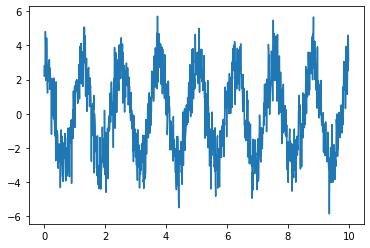

In [29]:
plt.plot(sample_time, voltage)
plt.show()

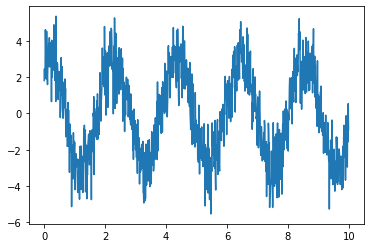

In [30]:
plt.plot(sample_time, current)
plt.show()

In [31]:
# 현재 시간값을 컴퓨터가 계산하고 있는 수치로 가져옴
ts = calendar.timegm(time.gmtime())

print(ts)

# sample_time이 이미 1000개의 배열이므로 곱셈을 수행할 경우 
# 각각의 배열의 값에 모두 수행
ts = (sample_time * 1000) + ts

print(ts)

1633942290
[1.63394229e+09 1.63394230e+09 1.63394231e+09 1.63394232e+09
 1.63394233e+09 1.63394234e+09 1.63394235e+09 1.63394236e+09
 1.63394237e+09 1.63394238e+09 1.63394239e+09 1.63394240e+09
 1.63394241e+09 1.63394242e+09 1.63394243e+09 1.63394244e+09
 1.63394245e+09 1.63394246e+09 1.63394247e+09 1.63394248e+09
 1.63394249e+09 1.63394250e+09 1.63394251e+09 1.63394252e+09
 1.63394253e+09 1.63394254e+09 1.63394255e+09 1.63394256e+09
 1.63394257e+09 1.63394258e+09 1.63394259e+09 1.63394260e+09
 1.63394261e+09 1.63394262e+09 1.63394263e+09 1.63394264e+09
 1.63394265e+09 1.63394266e+09 1.63394267e+09 1.63394268e+09
 1.63394269e+09 1.63394270e+09 1.63394271e+09 1.63394272e+09
 1.63394273e+09 1.63394274e+09 1.63394275e+09 1.63394276e+09
 1.63394277e+09 1.63394278e+09 1.63394279e+09 1.63394280e+09
 1.63394281e+09 1.63394282e+09 1.63394283e+09 1.63394284e+09
 1.63394285e+09 1.63394286e+09 1.63394287e+09 1.63394288e+09
 1.63394289e+09 1.63394290e+09 1.63394291e+09 1.63394292e+09
 1.63394293e+

In [34]:
# 실제 db에 넣기 위해 데이터 타입을 np,float32로 맞춰줌
sample_time = np.array(sample_time, dtype=np.float32)
voltage = np.array(voltage, dtype=np.float32)
current = np.array(current, dtype=np.float32)

In [35]:
curr_time = []

# datetime.datetime을 통해 시간값을 제어할 수 있으며
# datetime.datetime.fromtimestamp(컴퓨터시간).strftime(형식)을 통해
# 원하는 형태로 변환할 수 있음
for i in range(len(sample_time)):
    curr_time.append(
        datetime.datetime.fromtimestamp(ts[i]).strftime('%Y-%m-%d %H:%M:%S')
    )
    
print(curr_time)

['2021-10-11 17:51:30', '2021-10-11 17:51:40', '2021-10-11 17:51:50', '2021-10-11 17:52:00', '2021-10-11 17:52:10', '2021-10-11 17:52:20', '2021-10-11 17:52:30', '2021-10-11 17:52:40', '2021-10-11 17:52:50', '2021-10-11 17:53:00', '2021-10-11 17:53:10', '2021-10-11 17:53:20', '2021-10-11 17:53:30', '2021-10-11 17:53:40', '2021-10-11 17:53:50', '2021-10-11 17:54:00', '2021-10-11 17:54:10', '2021-10-11 17:54:20', '2021-10-11 17:54:30', '2021-10-11 17:54:40', '2021-10-11 17:54:50', '2021-10-11 17:55:00', '2021-10-11 17:55:10', '2021-10-11 17:55:20', '2021-10-11 17:55:30', '2021-10-11 17:55:40', '2021-10-11 17:55:50', '2021-10-11 17:56:00', '2021-10-11 17:56:10', '2021-10-11 17:56:20', '2021-10-11 17:56:30', '2021-10-11 17:56:40', '2021-10-11 17:56:50', '2021-10-11 17:57:00', '2021-10-11 17:57:10', '2021-10-11 17:57:20', '2021-10-11 17:57:30', '2021-10-11 17:57:40', '2021-10-11 17:57:50', '2021-10-11 17:58:00', '2021-10-11 17:58:10', '2021-10-11 17:58:20', '2021-10-11 17:58:30', '2021-10-1

In [37]:
# 소수점 형식의 데이터와 현재 시간값을 넣기
db = pymysql.connect(
    host = '127.0.0.1',
    port = 3306,
    user = mysql_user_info['user_id'],
    password = mysql_user_info['user_pw'],
    db = 'python_db'
)

cursor = db.cursor()

sql = """
    insert into power_data(voltage, current, vendor, name, reg_date)
    values(%s, %s, %s, %s, %s)
"""

# volt, curr의 데이터 타입이 np.float32이므로 db에 넣기 위해서는 str로 감싸주어야 함
try: 
    with db.cursor() as cursor:
        for i in range(len(sample_time)):
            cursor.execute(sql, (
                str(voltage[i]), str(current[i]), 'test', 'test', curr_time[i]
            ))
            
        db.commit()
finally:
    db.close()